# This Script Explores the Popularity of Chicago Bike Sharing Routes and Weather effects on Trip Times

We are going to look at the Chicago Bike Sharing Data from this [kaggle dataset](https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data)

Author: Nikhil Rao

GitHub: [https://github.com/nrao57](https://github.com/nrao57)

LinkedIn: [link](www.linkedin.com/in/nikhil-rao-54566862)

# Table of contents
1. [Introduction](#introduction)
2. [Import the Neccessary Libraries](#Libraries)
3. [Import the Dataset](#ImportData)
4. [Popularity of Bike Routes](#Popularity)
5. [Does bad weather slow bike riders?](#weather)

## Import the Neccessary Libraries <a name="Libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

## Import the Dataset <a name="ImportData"></a>

In [2]:
os.chdir("..")
data_set = pd.read_csv("Datasets/data.csv")
os.chdir('code')

What does the dataset look like?

In [3]:
data_set.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


What are the columns?

In [4]:
data_set.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

## Lets look at the popularity of certain bike routes <a name="Popularity"></a>

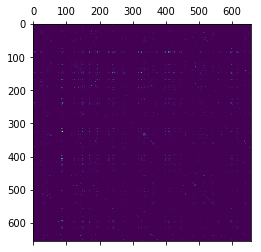

In [5]:
from_station="from_station_name"
to_station="to_station_name"
f1, ax1 = plt.subplots(1)
cross_table = pd.crosstab(data_set[from_station], data_set[to_station], normalize=False)
ax1.matshow(cross_table)
plt.show()

As you can see, there are certain bright spots in the heatmap visual, which indicates that some paths are more popular than others

### What is the most popular destination?

In [6]:
cross_table.sum().sort_values(ascending=False).head(4)

to_station_name
Clinton St & Washington Blvd    161152
Canal St & Adams St             139654
Canal St & Madison St           129632
Clinton St & Madison St         117378
dtype: int64

#### From the data, it seems that the most popular destinations are 
1. Clinton St & Washington Blvd    
2. Canal St & Adams St             
3. Canal St & Madison St           
4. Clinton St & Madison St

### What are the most popular routes?

In [7]:
top_to=cross_table.max().sort_values(ascending=False).head(4).index.values
most_pop = []
for top in top_to:
    most_pop.append([cross_table[top].sort_values(ascending=False).head(1).index.values[0], top])
most_pop

[['Columbus Dr & Randolph St', 'Clinton St & Washington Blvd'],
 ['Southport Ave & Wellington Ave', 'Sheffield Ave & Wellington Ave'],
 ['LaSalle St & Jackson Blvd', 'Canal St & Madison St'],
 ['Canal St & Madison St', 'Michigan Ave & Washington St']]

#### From the data, the most popular routes are
1. From Columbus Dr & Randolph St to Clinton St & Washington Blvd
2. From Southport Ave & Wellington Ave to Sheffield Ave & Wellington Ave
3. From LaSalle St & Jackson Blvd to Canal St & Madison St
4. From Canal St & Madison St to Michigan Ave & Washington St

#### Does this make sense to all of my Chicagoans out there?

## Does bad weather reduce the time of bike trips around the city?<a name="weather"></a>

### Lets take a look at the value counts to see the distribution of weather

In [17]:
data_set['events'].value_counts()/sum(data_set['events'].value_counts())

clear    0.938452
bad      0.061548
Name: events, dtype: float64

Based on the data, the majority of the time (88% to be exact) is cloudy. Then, the rest of the days are mostly clear or raining/snowing 

Lets combine "cloudy" and "clear" weather into one category called "clear". After all, cloudy does not mean there is precipitation. While we are at it, lets combine rain or snow, not clear, and tstorms into a category called "bad".

In [9]:
data_set.loc[data_set['events']=='cloudy','events']='clear'
data_set.loc[data_set['events']=='rain or snow','events']='bad'
data_set.loc[data_set['events']=='not clear','events']='bad'
data_set.loc[data_set['events']=='tstorms','events']='bad'
data_set = data_set[data_set['events']!='unknown']

In [10]:
data_set['tripduration'].describe()

count    9.494699e+06
mean     1.144687e+01
std      7.206053e+00
min      2.000000e+00
25%      6.033333e+00
50%      9.633333e+00
75%      1.520000e+01
max      6.000000e+01
Name: tripduration, dtype: float64

** Note: The trip time is in units of minutes **

From the data, the average bike ride takes around 12 minutes and the longest rides take an hour

### Pivot tables to find the mean and standard deviation for the weather groups

There is a problem with just doing a t-test on the weather and their corresponding trip durations. What if, for some reason, cloudy days have more of one specific route than another (route being defined as from one station to another)? Then, those specific routes might be naturally longer, no matter the weather. Therefore, we must conduct a t-test for all of the routes, which is approximately the number of stations squared or 656 squared!!!! 

However, if we can show that each weather (clear or bad) contains the same set of routes, then we can just do a t-test on the entire set (it will not be correct, but an aproximation). To determine this justification, we can look at all of the routes for each weather and compare the length of the set of their tuples

In [11]:
routes = data_set[['events',to_station, from_station]]

In [12]:
clear_routes=routes[routes['events']=='clear']
#len(set(cloudy_routes[to_station].values,cloudy_routes[from_station])))
unique_clear_routes = len(set(list(zip(*[clear_routes[c].values.tolist() for c in [to_station, from_station]]))))
print('The number of unique clear routes: {}'.format(unique_clear_routes))

The number of unique clear routes: 129367


In [13]:
bad_routes=routes[routes['events']=='bad']
#len(set(cloudy_routes[to_station].values,cloudy_routes[from_station])))
unique_bad_routes = len(set(list(zip(*[bad_routes[c].values.tolist() for c in [to_station, from_station]]))))
print('The number of unique bad routes: {}'.format(unique_bad_routes))

The number of unique bad routes: 63361


#### There are approximately twice as many unique routes for clear weather than bad weather. Therefore, we cannot legitimately compare the trip duration with a t-test. But lets do it anyway for practice  : ) <a name="wrongconclusion"></a>

Find the mean trip duration for each population of weather

In [14]:
data_set[['events','tripduration']].groupby('events').mean()

,tripduration
events,
bad,10.400526
clear,11.515496


Find the standard deviation for trip duration for each population of weather

In [15]:
data_set[['events','tripduration']].groupby('events').std()

,tripduration
events,
bad,6.595985
clear,7.238986


### Hypothesis Testing
Now that we have the mean and standard deviation for the weather, lets test the hypothesis with a t-test!

The null hypothesis will be that the **trip duration is equal for both clear and bad weather**

In [18]:
pop1 = data_set[data_set['events']=='clear']['tripduration']
pop2 = data_set[data_set['events']=='bad']['tripduration']
ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=124.40031228827422, pvalue=0.0)

### Results and Key Takeaways

The p-value is 0.0009 which is waaaay lower than the typical p-value threshold of 0.05. Therefore, the probability of obtaining the data's difference of the average trip duration (11.47 seconds for clear weather - 10.52 seconds for bad weather = 0.95 seconds) given that the real difference is zero is 0.09%!

Due to this low probability, the trip durations are most likely different for clear and bad weather, with **trips taking longer on clear days!**

What?!?! How can this be? 

Maybe people in chicago take their time on sunny days to enjoy their ride or choose to ride a bike longer distances when it is a beautiful day.

#### [NOTE: As stated above, since clear weather has twice as many unique routes as bad weather, this result is meaningless. The clear weather could, and probably does, contain routes that are longer distances!](#wrongconclusion) 